<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/reinforce/PPO_REINFORCE_COMPARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests
import pandas as pd
env_name = 'LunarLander-v2'
max_episodes = 1000
print_interval = 10
roll_mean = 30

# Reinforce

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Episode 10	Average Score: -207.87
Episode 20	Average Score: -202.02
Episode 30	Average Score: -199.03
Episode 40	Average Score: -187.76
Episode 50	Average Score: -191.24
Episode 60	Average Score: -186.49
Episode 70	Average Score: -184.39
Episode 80	Average Score: -187.06
Episode 90	Average Score: -185.12
Episode 100	Average Score: -180.35
Episode 110	Average Score: -177.70
Episode 120	Average Score: -174.43
Episode 130	Average Score: -164.15
Episode 140	Average Score: -167.81
Episode 150	Average Score: -162.17
Episode 160	Average Score: -164.47
Episode 170	Average Score: -168.82
Episode 180	Average Score: -165.45
Episode 190	Average Score: -168.23
Episode 200	Average Score: -169.02
Episode 210	Average Score: -166.92
Episode 220	Average Score: -166.53
Episode 230	Average Score: -170.03
Episode 240	Average Score: -166.31
Episode 250	Average Score: -165.88
Episode 260	Average Score: -160.62
Episode 270	Average Score: -154.77
Episode 280	Average Score: -154.49
Episode 290	Average Score: -1

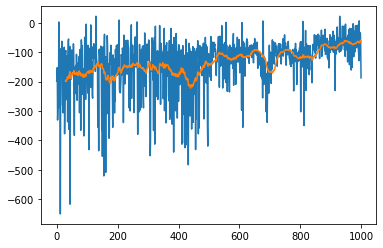

In [5]:
url = 'https://gist.githubusercontent.com/skywalker0803r/e3670ecbdc13ea04fb33d3035b5b9147/raw/c617f22c94bf1e3ef9115509e12fefba7a83725b/reinforce.py'
exec(requests.get(url).text)
env = gym.make(env_name)
history_reinforce = reinforce(env,n_episodes=max_episodes,print_every=print_interval)
plt.plot(history_reinforce)
plt.plot(pd.Series(history_reinforce).rolling(roll_mean).mean())

In [6]:
#pip install gym[box2d]

# PPO

Episode 0: -113.26413570561547
Episode 10: -235.59501613390887
Episode 20: -266.6341640229255
Episode 30: -48.709705730212775
Episode 40: -42.43653331732523
Episode 50: 27.234070310460453
Episode 60: -82.62614843416353
Episode 70: -2.8842763475520234
Episode 80: 12.620747821356602
Episode 90: -49.67977784447457
Episode 100: -15.180112103978203
Episode 110: -50.3630105666759
Episode 120: -43.6940613172457
Episode 130: -48.32944367158872
Episode 140: -14.558273313776795
Episode 150: 14.795661548007018
Episode 160: -16.206305368211602
Episode 170: -43.934430665944745
Episode 180: -94.04275282288383
Episode 190: 201.9107542924173
Episode 200: -15.12016749711016
Episode 210: 49.372488263440346
Episode 220: 201.85950286833273
Episode 230: -412.84518768478665
Episode 240: 22.34038226722268
Episode 250: -64.74901613714911
Episode 260: 260.34416061309435
Episode 270: 218.45286846137344
Episode 280: 227.65504099993836
Episode 290: 186.73381841862803
Episode 300: -473.40586577454144
Episode 310: 

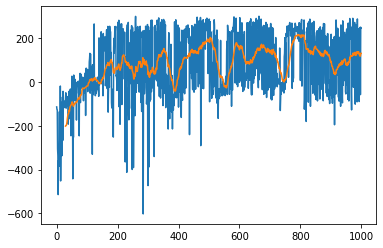

In [7]:
url = 'https://gist.githubusercontent.com/skywalker0803r/c363d8b2cf72a8aee06bc238a355fa01/raw/950f12a95eaab432a76dcf070fc40630b555a254/PPO.py'
exec(requests.get(url).text)
env = gym.make(env_name)
agent = PPOAgent(env)
history_ppo = agent.train(max_episodes=max_episodes,print_interval=print_interval)
plt.plot(history_ppo)
plt.plot(pd.Series(history_ppo).rolling(roll_mean).mean())

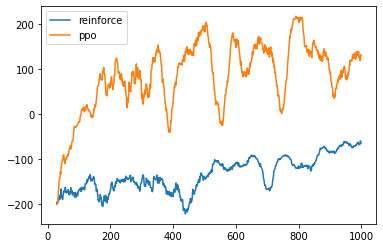

In [15]:
plt.plot(pd.Series(history_reinforce).rolling(roll_mean).mean(),label='reinforce')
plt.plot(pd.Series(history_ppo).rolling(roll_mean).mean(),label='ppo')
plt.legend()
plt.show()